In [3]:
import requests
import shutil
def callme():
    url = "https://www.cryptodatadownload.com/cdd/gemini_BTCUSD_1hr.csv"
    r = requests.get(url, verify=False,stream=True)
    if r.status_code!=200:
        print ("Failure!!")
        exit()
    else:
        r.raw.decode_content = True
        with open("file1.csv", 'wb') as f:
            shutil.copyfileobj(r.raw, f)
        print ("Success")

if __name__ == '__main__':
    callme()

/Users/natananisimov/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cryptodatadownload.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Success


In [4]:
import pandas as pd
import numpy as np

In [169]:
df = pd.read_csv('/Users/natananisimov/Desktop/file1.csv')
df = df.reset_index()
df.columns = df.iloc[0]
df = df[1:]
df['Datetime'] = pd.to_datetime(df['Date'])
df = df.drop(columns=['Unix Timestamp', 'Date'])
df = df[df['Datetime'] >= '2020-01-01 00:00:00']
df = df.sort_index(ascending=False, ignore_index=True)

In [170]:
df

,Symbol,Open,High,Low,Close,Volume,Datetime
0,BTCUSD,7165.9,7170.79,7146.6,7149.03,111.5146879322,2020-01-01 00:00:00
1,BTCUSD,7149.03,7199.21,7149.03,7185.97,127.4273929551,2020-01-01 01:00:00
2,BTCUSD,7185.97,7224.53,7185.97,7220.05,121.4656203492,2020-01-01 02:00:00
3,BTCUSD,7220.05,7221.06,7194.27,7199.04,25.4437312583,2020-01-01 03:00:00
4,BTCUSD,7199.04,7206.53,7187.99,7188.73,42.0973834665,2020-01-01 04:00:00
...,...,...,...,...,...,...,...
13028,BTCUSD,31595.77,31632.57,30999.11,31307.04,92.4121671319,2021-06-26 20:00:00
13029,BTCUSD,31307.04,31434.92,30926.76,31434.92,67.6057577701,2021-06-26 21:00:00
13030,BTCUSD,31434.92,31803.55,31384.75,31781.59,66.2759265608,2021-06-26 22:00:00
13031,BTCUSD,31781.59,32280.22,31631.57,32280.22,125.2705329378,2021-06-26 23:00:00


In [171]:
df['sma_short'] = df.Close.rolling(window=14, center=False).mean()
df['sma_long'] = df.Close.rolling(window=36, center=False).mean()
df = df.dropna()
df = df.reset_index()

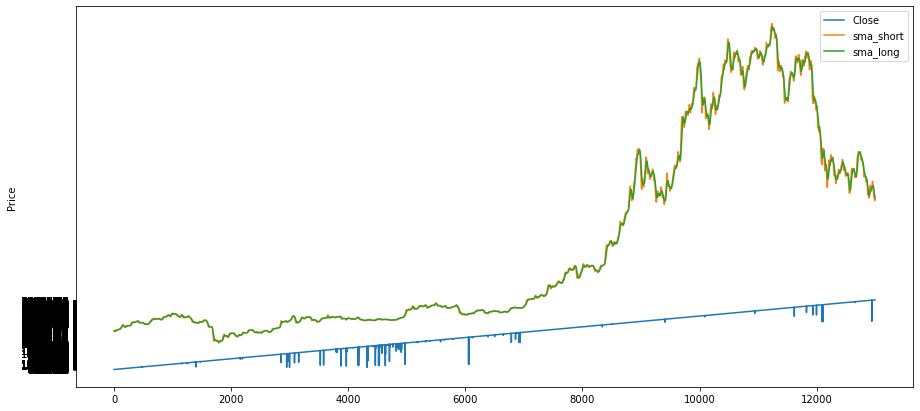

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.plot(df.index, df.Close)
plt.plot(df.index, df.sma_short)
plt.plot(df.index, df.sma_long)
plt.legend(['Close','sma_short', 'sma_long'])
plt.ylabel('Price')
plt.show()

In [208]:
payoff = [float(df['Close'][0])]
open_pos = []
close_pos = []

for i in range(len(df)-1):
    if float(df['sma_short'][i]) > float(df['sma_long'][i]):
        x = - 0.1 * float(df['Close'][i])
        open_pos.append(x)
        
    elif float(df['sma_short'][i]) < float(df['sma_long'][i]):
        x = 0.1 * float(df['Close'][i])
        close_pos.append(x)
        
    else:
        x = 0
        
    payoff.append(x)

In [209]:
len(open_pos)

7342

In [210]:
len(close_pos)

5655

In [211]:
payoff

[7117.19,
 711.719,
 713.3240000000001,
 710.801,
 711.816,
 711.311,
 702.7510000000001,
 694.8890000000001,
 695.9010000000001,
 696.567,
 692.9270000000001,
 695.9100000000001,
 695.2510000000001,
 694.49,
 692.149,
 687.0010000000001,
 693.811,
 693.0100000000001,
 719.442,
 719.253,
 719.1210000000001,
 718.7330000000001,
 724.198,
 733.4180000000001,
 729.3890000000001,
 -732.908,
 -731.212,
 -733.596,
 -724.703,
 -731.1020000000001,
 -738.9970000000001,
 -735.1680000000001,
 -734.0930000000001,
 -732.759,
 -731.236,
 -726.7170000000001,
 -729.9670000000001,
 -733.3000000000001,
 -730.194,
 -730.47,
 -732.0630000000001,
 -732.898,
 -732.5810000000001,
 -733.033,
 -734.6260000000001,
 -734.1790000000001,
 -733.957,
 -734.707,
 -730.0,
 -732.3040000000001,
 -730.004,
 -728.915,
 -730.37,
 -730.4970000000001,
 -729.433,
 -733.7950000000001,
 -729.2180000000001,
 -732.2550000000001,
 732.998,
 734.8240000000001,
 734.415,
 735.282,
 737.004,
 -745.5020000000001,
 -743.849,
 -746.8870

Annual Return: 3.5 %
Annual Volatility: 1.6
Max DD: -20334.45 %
Recovery factor: -0.0001720862361261514
Deals number: 12998
Positive deals: 7332 56.413 %
Negative deals: 5665 43.587 %


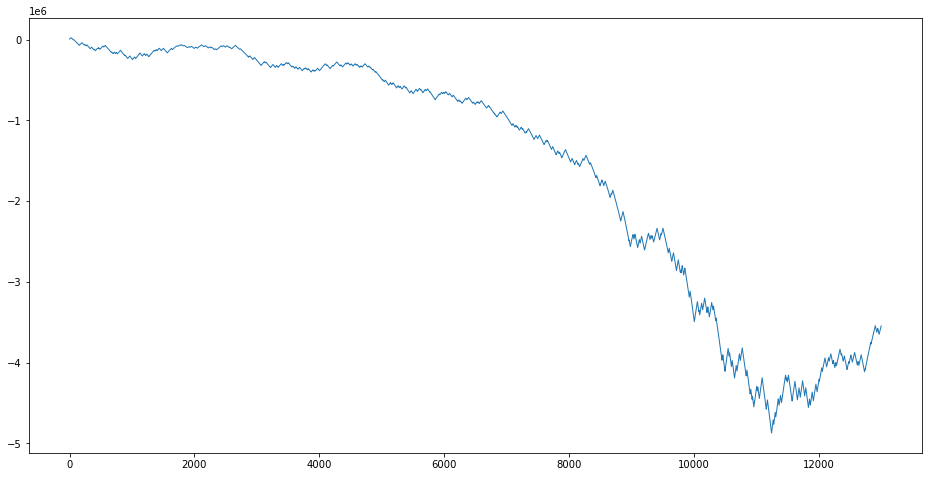

In [212]:
z = pd.DataFrame(payoff, columns = ['V'])
z['cum_V'] = z['V'].cumsum()
z['y'] = z['cum_V'].pct_change()

#y_1 = np.log(z['cum_V'])-np.log(z['cum_V'].shift(1))
sigma = z['y'].dropna().std()*np.sqrt(252)
mean = ((1+z['y'].dropna().mean())**252)-1
sharpe = mean/sigma
plt.figure(figsize=(16,8))
plt.plot(z.index, z['cum_V'], linewidth=1.0)
maxdd = (z['cum_V'].shift(-1)/z['cum_V'].shift(-1).cummax() - 1).min()
   
print('Annual Return:', round(100*mean,2),'%')
print('Annual Volatility:', round(sigma,2))
print('Max DD:', round(100*maxdd,2),'%')
print('Recovery factor:', mean/maxdd)
print('Deals number:', len(payoff))
print('Positive deals:', len(z[z['y']>0]), round(100*len(z[z['y']>0])/(len(z[z['y']>0])+ len(z[z['y']<0])),3),'%')
print('Negative deals:', len(z[z['y']<0]), round(100*len(z[z['y']<0])/(len(z[z['y']>0])+ len(z[z['y']<0])),3),'%')

In [213]:
import itertools

is_negative = [True if num < 0 else False for num in z['y'].dropna()]
groups = itertools.groupby(is_negative)
occurrences_of_negatives = [len(list(g)) for k, g in groups if k]

result = max(occurrences_of_negatives)

In [214]:
print('максимальное количество убыточных сделок подряд:', result)

максимальное количество убыточных сделок подряд: 91


In [215]:
z[z['cum_V']<0]

,V,cum_V,y
57,-732.255,-76.885,-1.117315
67,-745.392,-129.112,-1.209502
68,-746.008,-875.120,5.777991
69,-746.858,-1621.978,0.853435
70,-741.919,-2363.897,0.457416
...,...,...,...
12993,3159.577,-3557416.609,-0.000887
12994,3130.704,-3554285.905,-0.000880
12995,3143.492,-3551142.413,-0.000884
12996,3178.159,-3547964.254,-0.000895


In [216]:
z

,V,cum_V,y
0,7117.190,7117.190,NaN
1,711.719,7828.909,0.100000
2,713.324,8542.233,0.091114
3,710.801,9253.034,0.083210
4,711.816,9964.850,0.076928
...,...,...,...
12993,3159.577,-3557416.609,-0.000887
12994,3130.704,-3554285.905,-0.000880
12995,3143.492,-3551142.413,-0.000884
12996,3178.159,-3547964.254,-0.000895
